In [2]:
import tqdm
import os
import json
from matplotlib import pyplot as plt
import numpy as np
from datascience import *
import matplotlib
matplotlib.use('TkAgg')
%matplotlib inline
from post_processing import *

In [2]:
timestamps_dir = '/Users/leviharris/Library/CloudStorage/GoogleDrive-leviharris555@gmail.com/Other computers/mac_new/NBA_HUDL_data/nba-plus-statvu-dataset/timestamps'
dst_dir = '/Users/leviharris/Library/CloudStorage/GoogleDrive-leviharris555@gmail.com/Other computers/mac_new/NBA_HUDL_data/nba-plus-statvu-dataset/timestamps/post-processed'
timestamps = os.listdir(timestamps_dir)

# post process timestamps directory
for ts in tqdm.tqdm(timestamps):
    try:
        if not '.json' in ts:
            continue
        fp = os.path.join(timestamps_dir, ts)
        dst = os.path.join(dst_dir, ts) 
        with open(fp, 'r') as f:
            timestamp = json.load(f)
        timestamp = post_process_timestmaps(timestamp)
        with open(dst, 'w') as f:
            json.dump(timestamp, f, indent=4)
    except:
        print(f'Could not post process: {ts}')

  2%|▏         | 5/239 [00:01<00:53,  4.38it/s]/Users/leviharris/Desktop/contextualized-shot-quality-estimation/post_processing.py:101: RuntimeWarning: invalid value encountered in divide
  return (arr - _min) / (_max - _min)
  3%|▎         | 7/239 [00:01<00:48,  4.81it/s]

Could not post process: 17864_12-12-2015_3175_Phoenix Suns_21_Portland Trail Blazers_period4.json


 36%|███▋      | 87/239 [00:19<00:32,  4.66it/s]

Could not post process: 18097_11-06-2015_21_Portland Trail Blazers_2976_Memphis Grizzlies_period2.json


 97%|█████████▋| 233/239 [00:58<00:07,  1.26s/it]

Could not post process: 17923_12-03-2015_2977_Charlotte Hornets_2_Golden State Warriors_period2.json


100%|██████████| 239/239 [00:59<00:00,  3.99it/s]


In [4]:
timestamps_dir = r'/Users/leviharris/Library/CloudStorage/GoogleDrive-leviharris555@gmail.com/Other computers/mac_new/NBA_HUDL_data/nba-plus-statvu-dataset/timestamps/post-processed'
timestamps = [os.path.join(timestamps_dir, f) for f in os.listdir(timestamps_dir)]
example = timestamps[0]
example

'/Users/leviharris/Library/CloudStorage/GoogleDrive-leviharris555@gmail.com/Other computers/mac_new/NBA_HUDL_data/nba-plus-statvu-dataset/timestamps/post-processed/17709_01-03-2016_78_Toronto Raptors_7_Chicago Bulls_period3.json'

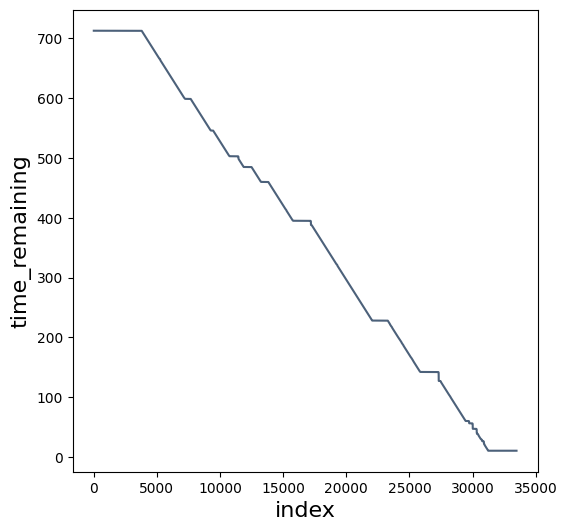

In [8]:
i = 3
time_remaining_values = get_time_remaining_from_timestamps_fp(timestamps[i])

# with open(timestamps[i], 'r') as f:
#     _timestamps = json.load(f)
# post_processed_timestamps = post_process_timestmaps(_timestamps)
# pp_time_remaining = get_time_remaining_from_timestamps(post_processed_timestamps)
    
indicies = np.arange(0, len(time_remaining_values))

timestamps_table = Table().with_columns(
    'index', indicies,
    'time_remaining', time_remaining_values,
    # 'post_processed_time_remaining', pp_time_remaining,
)
timestamps_table.plot('index')
